In [1]:
import math
import numpy as np

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
def distToOrigin(x, y):
    return math.sqrt(x**2 + y**2)

def pointDist(x, y, x0, y0):
    return math.sqrt((x-x0)**2 + (y-y0)**2)

In [4]:
def anotherCoord(r, a, lb, ub, st, dim=0):
    if r < abs(a):
        return
    b = math.sqrt(r**2 - a**2)
    if -b >= lb and -b <= ub:
        b = -b
    elif not (b >= lb and b <= ub):
        return
    if dim == 0:
        st.add((a, b))
    else:
        st.add((b, a))
#end def

# 矩形和圆的近似相交面积
def intersect(x, y, r):
    left   = x - width/2
    right  = x + width/2
    top    = y + height/2
    bottom = y - height/2
    
    stCross = set()
    anotherCoord(r, left, bottom, top, stCross)
    anotherCoord(r, right, bottom, top, stCross)
    anotherCoord(r, bottom, left, right, stCross, 1)
    anotherCoord(r, top, left, right, stCross, 1)
    
    #print(stCross)
    if len(stCross) < 2:
        return 0
    
    lsVtx = [(left, top), (right, top), (left, bottom), (right, bottom)]
    lsCross = list(stCross)
    x1, y1 = lsCross[0]
    x2, y2 = lsCross[1]
    if ((x1, y2) in lsVtx) or (((x2, y1) in lsVtx)):
        #print('能切出一块三角形')
        area = abs((y2-y1) * (x2-x1) / 2)
    else:
        #print('切不出三角形')
        if y1 > bottom and y2 > bottom:    # 水平斜边
            area = abs((y1-bottom+y2-bottom)*width/2)
        else:    # 竖直斜边
            area = abs((x1-left+x2-left)*height/2)
        #end if
    #end if
    
    area = min(area, width*height-area)
    return area
#end def
        

In [5]:
def putInRect(x, y, r, st):
    if (x, y) in st:
        return
    
    st.add((x, y))
    
    # 逆时针转动
    hdir = -width       # 水平方向
    vdir = height       # 垂直方向
    if y < 0 or (y == 0 and x < 0):
        hdir = -hdir    # 坐标轴的下半部分，向右转动
    if x < 0 or (x == 0 and y > 0):
        vdir = -vdir    # 坐标轴的左半部分，向下转动
    
    lsCoord = [(x+hdir, y), (x, y+vdir), (x+hdir, y+vdir)]
    lsArea = []
    for a, b in lsCoord:
        lsArea.append(intersect(a, b, r))
    
    iMax = lsArea.index(max(lsArea))
    
    putInRect(*lsCoord[iMax], r, st)

In [11]:
diameter = 9
radius = (diameter-1)/2
width = 1#math.sqrt(2)    # width of rectangle
height = 1
pixel_set = set()

rightx = round(radius/width)*width
topy = round(radius/height)*height
putInRect(rightx, 0, radius, pixel_set)

<IPython.core.display.Javascript object>


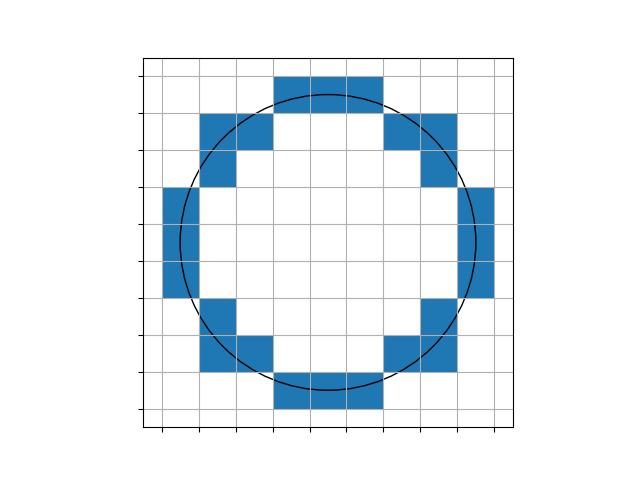

In [12]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')  # 111: nrows, ncols, plot_number
ax1.set_xlim(-radius-1, radius+1)
ax1.set_ylim(-radius-1, radius+1)

ax1.set_xticks(np.arange(-rightx-width/2, rightx+width, width))
ax1.set_yticks(np.arange(-topy-height/2, topy+height, height))

for x, y in pixel_set:
    ax1.add_patch(
        patches.Rectangle(
            (x-width/2, y-height/2),   # (x,y)
            width,          # width
            height,          # height
            fill=True      # fill color
        )
    )
#end for

# add a true round circle
crcl = plt.Circle((0, 0), radius, color='black', fill=False)
ax1.add_artist(crcl)

ax1.grid()

# don't show axis labels
ax1.get_xaxis().set_ticklabels([])
ax1.get_yaxis().set_ticklabels([])

plt.show()

In [57]:
def visualCenter(x, y):
    x1 = x - 0.5
    x2 = x + 0.5
    y1 = y - 0.5
    y2 = y + 0.5
    
    w1 = distToOrigin(x1, y1)
    w2 = distToOrigin(x1, y2)
    w3 = distToOrigin(x2, y1)
    w4 = distToOrigin(x2, y2)
    
    x = ((w1+w2)*x1 + (w3+w4)*x2) / (w1+w2+w3+w4)
    y = ((w1+w3)*y1 + (w2+w4)*y2) / (w1+w2+w3+w4)
    
    return (x, y)
#end def

def chooseCloseSquare(x, y):
    xf = math.floor(x)
    xc = math.ceil(x)
    yf = math.floor(y)
    yc = math.ceil(y)
    
    lsX = 
    x1, y1 = visualCenter(xf, yf)
    x2, y2 = visualCenter(xf, yc)
    x3, y3 = visualCenter(xc, yf)
    x4, y4 = visualCenter(xc, yc)
    
    

range(-10, 10)

In [83]:
diameter = 27
radius = (diameter-1)/2
#radius

#n = math.ceil(4 * math.pi * radius)
n = round(2 * math.pi * radius)
pixel_set = set()
for i in range(n):
    angle = 2*math.pi * i / n
    x = math.cos(angle) * radius
    y = math.sin(angle) * radius
    xi = round(x)
    yi = round(y)
    #if pointDist(xi, yi)
    pixel_set.add((xi, yi))
#end for
#pixel_set

In [24]:
import time

In [31]:
t = time.struct_time((1910,10,1,0,0,0,0,0,0))

In [32]:
t

time.struct_time(tm_year=1910, tm_mon=10, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=0, tm_isdst=0)

In [11]:
from sys import getrefcount as grc

In [1]:
import Pomposo

In [2]:
p = Pomposo.Guernica()

In [5]:
s = p.concat("你好", " young")

In [6]:
print(s)

你好 young


In [16]:
grc(s)

2

In [ ]:
p.concat()